In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize']=(20,5)
# import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv(r'C:/Users/Harsh/Downloads/DLMS Data/DLMS_Mydata.csv')

In [3]:
# Data Convesion
df['Time']=pd.to_datetime(df['Time'])
df.set_index(['Time'],inplace=True,drop= True)

#checks
# Null value
if df.isna().sum().sum()!=0:
    df.dropna(inplace=True)

filtered_df = df[(df['L1VAvg'] == 0) | (df['L2VAvg'] == 0) | (df['L3VAvg'] == 0) | (df['L1CAvg'] == 0) | (df['L2CAvg'] == 0) | (df['L3CAvg'] == 0)]

filtered_df.loc[:, :] = 0
df.loc[filtered_df.index, :] = filtered_df

dfresample=df[['kwh']].resample(rule='1H').sum()
# print(dfresample.isna().sum())


,seasonal,trend,resid,kwh
Time,,,,
2022-11-18 00:00:00,199.512897,NaN,NaN,261.3
2022-11-18 01:00:00,67.023969,NaN,NaN,509.1
2022-11-18 02:00:00,-36.321355,NaN,NaN,481.5
2022-11-18 03:00:00,-107.581753,NaN,NaN,472.2
2022-11-18 04:00:00,-168.934107,NaN,NaN,480.8
...,...,...,...,...
2023-10-31 22:00:00,264.657638,NaN,NaN,1066.9
2023-10-31 23:00:00,293.501184,NaN,NaN,975.5
2023-11-01 00:00:00,199.512897,NaN,NaN,887.0


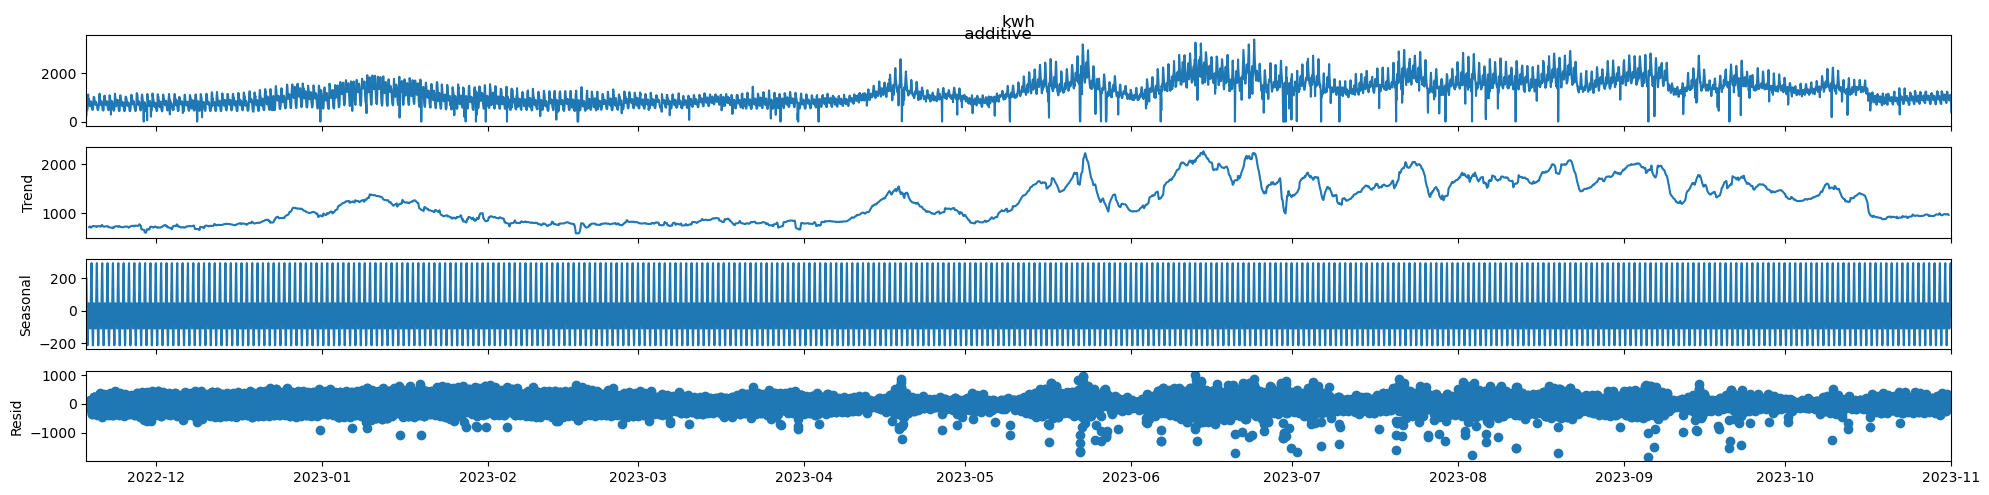

In [4]:
add_resut=seasonal_decompose(dfresample['kwh'],model='additive',period=24)
add_resut.plot().suptitle('\n additive',fontsize=12)
df_s=pd.concat([add_resut.seasonal,add_resut.trend,add_resut.resid,add_resut.observed],axis=1)
df_s.columns=["seasonal",'trend','resid','kwh']
df_s